In [1]:
import numpy as np
import mesa
from model import HumanitarianLogistics, COA, AZC, Newcomer, City, NGO
import activity
from Values import Values
import matplotlib.pyplot as plt

In [2]:
#initial config
width = 200
height = 200
num_pols = 2
city_size = 20
number_steps = 10


In [3]:
#helper functions
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient
def gen_hist(group):
    names = group[0].action_names
    hist = {name:0 for name in names}


    for c in group:
        for name in names:
            for act in c.actions:
                if act.name == name:
                    hist[name] += act.counter
    plt.bar(hist.keys(), hist.values())
    plt.title('Action Histogram')
    plt.show()
    

In [9]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
coa = [x for x in test.schedule.agents if type(x) is COA][0]


In [10]:
print(coa.budget.accounts)
print(coa.budget.replenish_amounts)
coa.budget.spend('Housing', 2)
print(coa.budget.accounts)
print(coa.budget.replenish_amounts)
coa.budget.replenish()
print(coa.budget.accounts)
coa.budget.replenish_amounts['Housing'] = 20
coa.budget.replenish()
coa.budget.accounts





{'Housing': 15, 'Staff': 12}
{'Housing': 15, 'Staff': 12}
{'Housing': 13, 'Staff': 12}
{'Housing': 15, 'Staff': 12}
{'Housing': 15, 'Staff': 12}


{'Housing': 20, 'Staff': 12}

## NGO Testing

In [3]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
cities = [x for x in test.schedule.agents if type(x) is City]
NGO = [x for x in test.schedule.agents if type(x) is NGO]

for city in cities:
    city.public_opinion = 0.05
data = np.zeros(shape = (number_steps, 2))

for step in range(0,number_steps):
    test.step()
    
    ng = np.mean([x.funds for x in NGO])
    ct = np.mean([x.public_opinion for x in cities])
    
    data[step,0] = ng
    data[step, 1] = ct

plt.plot(data)
plt.title('PO and Funds over time')
plt.legend(['Funds', 'PO'])    
plt.show()



    


/home/phillip/Documents/Thesis/Code/working_model/activity.py:230: RuntimeWarning: divide by zero encountered in long_scalars
  self.agent.city.azcs])
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
Fundraise
too small, just raising funds 0.05 0.05
edp :  nan
as :  nan
as_ext :  nan
tr :  nan
edp :  0.0
as :  nan
as_ext :  nan
tr :  nan
edp :  0.0
as :  0.0
as_ext :  nan
tr :  nan
edp :  0.0
as :  0.0
as_ext :  nan
tr :  nan
edp :  0.0
as :  0.0
as_ext :  nan
tr :  nan
edp :  0.0
as :  0.0
as_ext :  nan
tr :  nan
edp :  0.0
as :  0.0
as_ext :  nan
tr :  nan
Fundraise
too small, just raising funds 0.05 0.0975
Fundraise
too small, just raising funds 0.05 0.0975
Fundraise
too small, just raising funds 0.05 0.0975
Fundraise
too small, just rai

edp :  0.0
as :  0.0
as_ext :  0.0
tr :  0.0
edp :  0.0
as :  0.0
as_ext :  0.0
tr :  0.0
edp :  0.0
as :  0.0
as_ext :  0.0
tr :  0.0
edp :  0.0
as :  0.0
as_ext :  0.0
tr :  0.0
edp :  0.0
as :  0.0
as_ext :  0.0
tr :  0.0
marketingCampaign
Marketing before 0.25 0.3904947626347656
Marketing after 0.2792871071976074 0.3612076554371582
marketingCampaign
Marketing before -18102.093371957068 1655.4501309317768
Marketing after 2978774.735915694 -2995221.3791567194
marketingCampaign
Marketing before 0.25 0.3904947626347656
Marketing after 0.2792871071976074 0.3612076554371582
marketingCampaign
Marketing before 0.25 0.3904947626347656
Marketing after 0.2792871071976074 0.3612076554371582
marketingCampaign
Marketing before 0.25 0.3904947626347656
Marketing after 0.2792871071976074 0.3612076554371582
marketingCampaign
Marketing before -16206.235164966347 5065.46305601765
Marketing after 8193508.861667749 -8204649.633776697
marketingCampaign
Marketing before 0.25 0.3904947626347656
Marketing a

UnboundLocalError: local variable 'worst' referenced before assignment

## Action Improve Facilities
## Metric: building Health

/home/phillip/Documents/Thesis/Code/working_model/activity.py:85: RuntimeWarning: divide by zero encountered in long_scalars
  self.agent.city.azcs])


inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
0.2692307692307693
0.24
0.24
0.24
0.6666666666666667
0.2592592592592593
0.7935483870967742
0.7987012987012987
0.7806451612903225
0.22222222222222224
0.22222222222222224
0.7806451612903225
0.21428571428571427
0.7658227848101266
0.24137931034482762
0.975609756097561
0.21428571428571427
0.3214285714285714
0.2068965517241379
0.2068965517241379
0.3214285714285714
0.2068965517241379
0.2068965517241379
0.3103448275862069
0.2068965517241379
0.7834394904458599
1.1764705882352942
0.6811594202898551
0.9954545454545455
0.9591836734693878
0.746031746031746
0.9494949494949495
0.9732142857142856
0.9591836734693878
0.9591836734693878
0.9732142857142856
0.9733333333333335
0.9595959595959597
0.9494949494949495
0.9494949494949495
0.9732142857142856
0.9733333333333335
0.9494949494949495
0.9591836734693878
0.9693877551020408
0.9494949494949495
0.94
0.9595959595959597
0.9595959595959597
0.959595959595

0.5
0.5
0.9743589743589742
0.9913043478260869
1.0086580086580086
1.0
0.9913043478260869
1.0086206896551726
0.5945945945945945
1.0130434782608695
1.0130434782608695
1.0086206896551726
1.0086580086580086
1.0086206896551726
1.0130434782608695
1.0086206896551726
0.9827586206896551
1.0130434782608695
1.012987012987013
1.0130434782608695
0.9827586206896551
1.012987012987013
1.0173913043478262
1.0086580086580086
1.012987012987013
1.0086580086580086
1.012987012987013
0.968
0.4583333333333333
0.4680851063829787
1.0176211453744495
0.9448818897637795
1.0087719298245614
0.9453125
1.0132158590308369
1.0132158590308369
1.0175438596491226
1.0176211453744495
1.0176211453744495
1.0132158590308369
1.0131578947368423
1.0131578947368423
0.9302325581395349
1.0131578947368423
0.9453125
1.0176211453744495
0.9302325581395349
1.0131578947368423
1.0087719298245614
1.0220264317180616
1.0131578947368423
1.0087719298245614
0.8148148148148148
1.0265486725663717
0.5384615384615385
0.9955752212389382
0.99557522123893

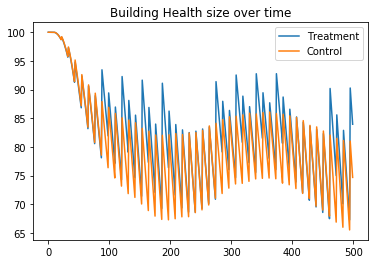

In [11]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [coa for coa in test.schedule.agents if
            type(coa) is COA and coa.city.modality == 'AZC'
             and coa.unique_id % 2 == 0]
control = [coa for coa in test.schedule.agents if
            type(coa) is COA and coa.city.modality == 'AZC'
           and coa.unique_id % 2 == 1]

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 60
    x.self_transcendence = 45    
    x.conservatism = 48
    x.openness_to_change = 55
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
for x in control:
    x.self_enhancement = 35
    x.self_transcendence = 45    
    x.conservatism = 48
    x.openness_to_change = 52
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    trt = []
    for coa in treatment:
        trt.append([building.health for building in
                   coa.city.azcs])
    data[step,0] = np.mean(trt)
    
    cntrl = []
    for coa in control:
        cntrl.append([building.health for building in
                   coa.city.azcs])
    data[step,1] = np.mean(cntrl)
        
    

    


plt.plot(data)
plt.title('Building Health size over time')
plt.legend(['Treatment', 'Control'])    
plt.show()






    
    


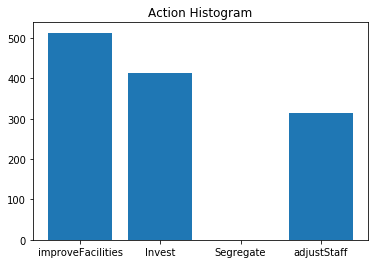

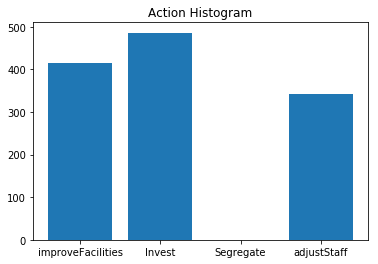

In [12]:
gen_hist(treatment)
gen_hist(control)

## Action: Adjust Staff COA
## Metric: Staff size



/home/phillip/Documents/Thesis/Code/working_model/activity.py:65: RuntimeWarning: divide by zero encountered in long_scalars
  self.agent.city.azcs])
/home/phillip/Documents/Thesis/Code/working_model/activity.py:65: RuntimeWarning: invalid value encountered in true_divide
  self.agent.city.azcs])


inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
inf
inf
inf
inf
nan
inf
nan
inf
nan
nan
inf
inf
inf
nan
inf
0.7806451612903225
0.5612244897959183
0.7884615384615384
0.7884615384615384
0.7756410256410255
5.0
0.7834394904458599
5.0
0.25
0.25
5.0
0.25
0.2857142857142857
0.2857142857142857
4.761904761904762
0.75625
4.545454545454545
4.545454545454545
0.22727272727272727
0.22727272727272727
4.347826086956522
4.347826086956522
0.7746478873239436
4.347826086956522
0.25
0.20833333333333334
0.8208955223880597
1.0
1.0
14.285714285714286
1.0
0.9864864864864866
1.0
0.9865470852017938
1.0
0.9456264775413713
1.0
0.9456264775413713
14.285714285714286
1.0
1.0
8.333333333333334
0.9605263157894738
25.0
25.0
8.333333333333334
1.0
14.285714285714286
0.9521739130434783
0.9852216748768474
25.0
1.0
0.9401709401709402
8.333333333333334
0.9671532846715329
0.8695652173913043
0.8695652173913043
0.8695652173913043
1.1225626740947074
0.8695652173913043
0.7217391304347825
0.9565217391304348
0.7155172413793103
0.715

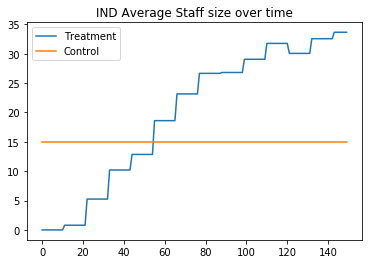

In [4]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [coa for coa in test.schedule.agents if
            type(coa) is COA and coa.city.modality == 'AZC'
             and coa.unique_id % 2 == 0]
control = [coa for coa in test.schedule.agents if
            type(coa) is COA and coa.city.modality == 'AZC'
           and coa.unique_id % 2 == 1]

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 45    
    x.conservatism = 55
    x.openness_to_change = 80
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 45    
    x.conservatism = 55
    x.openness_to_change = 20
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    data[step,0] = np.mean([coa.staff for coa in
                            treatment])
    data[step,1] = np.mean([coa.staff for coa in
                           control])
        
    

    


plt.plot(data)
plt.title('IND Average Staff size over time')
plt.legend(['Treatment', 'Control'])    
plt.show()






    
    


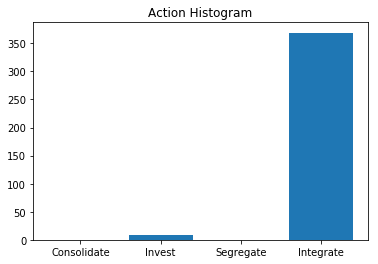

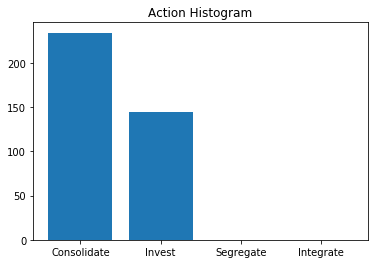

In [12]:
gen_hist(treatment)
gen_hist(control)

## Acculturation, Football
## Metric: NC acculturation

Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
True Football
Invest
Invest
True Volunteer
Invest
True Football
Invest
True Football
True Football
True Football
Invest
Invest
True Football
True Football
Invest
True Football
Invest
True Volunteer
Invest
Invest
True Football
Invest
True Football
Invest
Invest
Invest
Invest
Invest
Invest
True Football
True languageClass
True Football
Invest
True Football
Invest
True Football
Invest
True Football
True Football
True Football
Invest
Invest
True Football
Invest
True Football
True Football
Invest
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True F

True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
Invest
Invest
True Football
True Football
Invest
True Volunteer
Invest
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
Invest
True languageClass
True Football
True languageClass
Invest
True Football
Invest
True Volunteer
True Football
Invest
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
Invest
True Volunteer
True Volunteer
Invest
True Football
True Football
True Football
True languageClass
Invest
True Volunteer
Invest
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Foot

True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Footba

True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True la

True Football
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Vo

True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Footba

True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Volunteer


True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True 

True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football


True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football


True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
Invest
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
Invest
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
Tru

True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football

True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer


True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageCla

True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True lang

True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True

True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True 

True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
T

Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True lang

True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True languag

True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True 

True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Volunt

True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Volu

True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Footbal

True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Foot

True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
Invest
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
Invest
True Volunteer
True Football
True languageClass
True Volunteer
Invest
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True

True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
Tru

True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True lan

True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Footbal

True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football


True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football


True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True V

True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True 

True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True language

True languageClass
True Volunteer
True languageClass
True Volunteer
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Footb

True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
T

True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True languageClass

True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunt

True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True language

True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Footbal

True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True langua

True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True 

True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True

True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volu

True Football
True Football
Invest
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Footbal

True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
Invest
True Volunteer
True Football
True Football
True Volunteer
True Football
Invest
Invest
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Vol

True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True languageClas

True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True

True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True V

True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Foot

True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True

True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True

True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football


True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
Invest
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
Invest
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
Invest
T

True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunte

True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Vol

True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer

True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
T

True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
Tru

True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Foot

True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True

True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
T

True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
T

True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClas

True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True F

Invest
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
Invest
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
Invest
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass


True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
Tr

True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunte

True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football

True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True F

True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True langu

True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Foo

True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True langua

True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True lan

True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
Invest
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
T

True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
Tru

True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Volunteer

True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
Tr

True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volun

True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True languag

True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Voluntee

True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunte

True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
Tr

True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Vol

True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Footba

True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Foo

True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
Invest
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageC

True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Fo

True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Footbal

True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
Tr

True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
Tr

True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True langua

True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True lang

True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True

True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True F

True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True

True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True languageClass
Invest
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True

True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
Invest
True languageClass
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Foo

True Football
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True la

True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True languageCl

True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True la

True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football


True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClas

True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Volunt

True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True lang

True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass


True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Fo

True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Footbal

True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True lang

True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Volun

True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True 

True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True

True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True

True Volunteer
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True languageClass
True 

True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
Tr

True languageClass
True languageClass
True Football
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True Volunteer
True Football
True Footb

True Football
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True Vo

True Volunteer
True Football
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Football
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Fo

True languageClass
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
Invest
True Football
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True languageClass
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Football
True Football
True Football
True Volunteer
True Football

True languageClass
True Volunteer
True Volunteer
True Volunteer
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Volunteer
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
Invest
True languageClass
True Football
True languageClass
True languageClass
True Volunteer
True languageClass
True Football
True Volunteer
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True languageClass
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True Volunteer
True Voluntee

True Volunteer
True Volunteer
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Volunteer
True languageClass
True Football
True Volunteer
True Volunteer
True Football
True Football
True Football
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True languageClass
True languageClass
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Volunteer
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Volunteer
True Volunteer
True Football
True Volunteer
True Footbal

True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True Football
True Football
True Football
True Volunteer
True languageClass
True Volunteer
True Volunteer
True languageClass
True Football
True Football
True languageClass
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True Football
True languageClass
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Football
True Volunteer
True Football
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
T

True languageClass
True Volunteer
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Volunteer
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Football
True languageClass
True Volunteer
True languageClass
True Football
True Football
True Football
True Football
True Football
True Football
True Football
True Volunteer
True Volunteer
True Football
True Football
True languageClass
True Volunteer
True Football
True Football
True Volunteer
True Football
True languageClass
True languageClass
True Football
True languageClass
True Football
True Volunteer
True Football
True languageClass
True Football
True Football
True languageClass
True Football
True languageClass
True Football
True languageClass
True languageClass
True Football
True Football
True Volunteer
True languageClass
True languageClass
True Volunteer
True languageClass
True Volunteer
True Volunteer
True Football
True Football


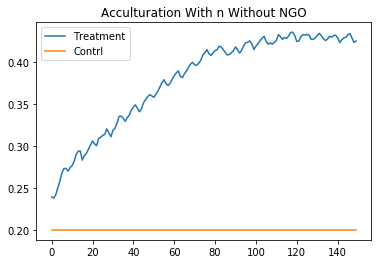

In [4]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action


treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo != None]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo == None]

data = np.zeros(shape = (number_steps, 2))

   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        [trt.append(nc.acculturation) for nc in x.occupants if
                   nc.ls == 'as_ext']
        
    for y in control:
        [cntrl.append(nc.acculturation) for nc in y.occupants if
                   nc.ls == 'as_ext']
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)
    

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Acculturation With n Without NGO')
plt.show()



        


In [5]:
for c in control:
    print(c.activity_center.counter)
    print(c.activity_center.activities_available)

{'languageClass': 7500, 'Doctor': 151, 'Work': 1337}
{<activity.Language_Class object at 0x7f9983d25780>, <activity.Work object at 0x7f9983d257b8>, <activity.Doctor object at 0x7f9983d257f0>}
{'languageClass': 7500, 'Doctor': 151, 'Work': 1337}
{<activity.Language_Class object at 0x7f9983d25780>, <activity.Work object at 0x7f9983d257b8>, <activity.Doctor object at 0x7f9983d257f0>}
{'Work': 686, 'languageClass': 5844, 'Doctor': 163}
{<activity.Doctor object at 0x7f9983d25c18>, <activity.Language_Class object at 0x7f9983d25ba8>, <activity.Work object at 0x7f9983d25be0>}
{'Work': 686, 'languageClass': 5844, 'Doctor': 163}
{<activity.Doctor object at 0x7f9983d25c18>, <activity.Language_Class object at 0x7f9983d25ba8>, <activity.Work object at 0x7f9983d25be0>}
{'Work': 6194, 'languageClass': 4417, 'Doctor': 164}
{<activity.Doctor object at 0x7f9983d2f080>, <activity.Work object at 0x7f9983d2f048>, <activity.Language_Class object at 0x7f9983d25fd0>}
{'Work': 6194, 'languageClass': 4417, 'Doc

## Public Opinion / Volunteer



/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


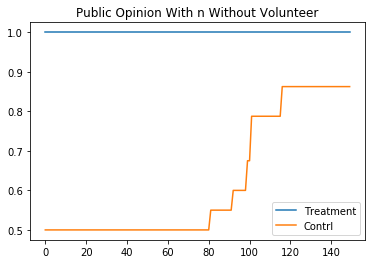

In [3]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action


treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo != None]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo == None]

data = np.zeros(shape = (number_steps, 2))

   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(x.city.public_opinion)
        
    for y in control:
        cntrl.append(y.city.public_opinion)
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)
    

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Public Opinion With n Without Volunteer')
plt.show()



        


In [4]:
for x in control:
    print(x.city.ngo)
    print(x.activity_center.counter)

None
{'languageClass': 5243, 'Work': 1040, 'Doctor': 162}
None
{'languageClass': 5243, 'Work': 1040, 'Doctor': 162}
None
{'Work': 2500, 'languageClass': 9286, 'Doctor': 184}
None
{'Work': 2500, 'languageClass': 9286, 'Doctor': 184}
None
{'languageClass': 11626, 'Work': 3633, 'Doctor': 196}
None
{'languageClass': 11626, 'Work': 3633, 'Doctor': 196}
None
{'Work': 7168, 'languageClass': 3052, 'Doctor': 211}
None
{'Work': 7168, 'languageClass': 3052, 'Doctor': 211}
None
{'languageClass': 9327, 'Doctor': 164, 'Work': 2391}
None
{'languageClass': 9327, 'Doctor': 164, 'Work': 2391}


## Action: Football (NGO presence at all)
## Metric: NC Health

/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


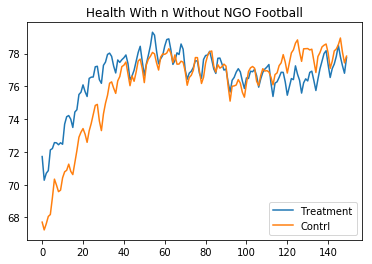

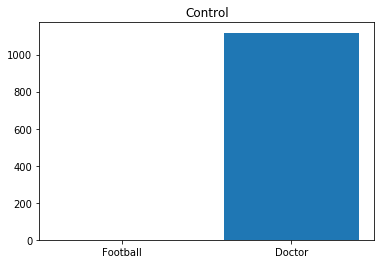

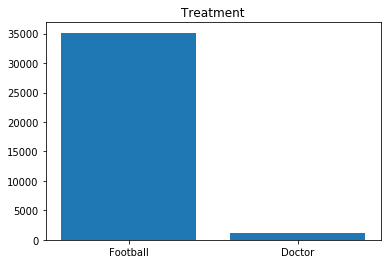

In [4]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action


treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo != None]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo == None]

data = np.zeros(shape = (number_steps, 2))

   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(np.mean([nc.health for nc in x.occupants]))
        
    for y in control:
        cntrl.append(np.mean([nc.health for nc in y.occupants]))
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)
    

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Health With n Without NGO Football')
plt.show()

out = {'Football': 0, 'Doctor': 0}
outt = {'Football': 0, 'Doctor': 0}

for x in ['Football', 'Doctor']:
    for z in treatment:
        outt[x] += z.city.azc.activity_center.counter[x]
for y in control:
        out['Doctor'] += y.city.azc.activity_center.counter['Doctor']
        
plt.bar(range(len(out)), list(out.values()))
plt.xticks(range(len(out)), list(out.keys()))
plt.title('Control')
plt.show()

plt.bar(range(len(outt)), list(outt.values()), align='center')
plt.xticks(range(len(outt)), list(outt.keys()))
plt.title('Treatment')
plt.show()


In [5]:
for y in control:
    print(y.activity_center.counter)

{'Work': 7828, 'languageClass': 6159, 'Football': 6034, 'Doctor': 177}
{'Work': 7828, 'languageClass': 6159, 'Football': 6034, 'Doctor': 177}
{'Work': 7172, 'languageClass': 7019, 'Football': 5803, 'Doctor': 193}
{'Work': 7172, 'languageClass': 7019, 'Football': 5803, 'Doctor': 193}
{'Work': 7294, 'languageClass': 6634, 'Football': 5750, 'Doctor': 189}
{'Work': 7294, 'languageClass': 6634, 'Football': 5750, 'Doctor': 189}


## Action:Doctor
## Metric: NC health

/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


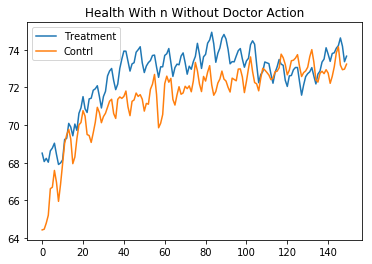

In [6]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action

treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and
       azc.unique_id % 2 == 0]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and
       azc.unique_id % 2 == 1]

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    aa = set([])
    for act in x.activity_center.activities_available:
        if type(act) is not activity.Doctor:
            aa.add(act)
    x.activity_center.activities_available = aa
   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(np.mean([nc.health for nc in x.occupants]))
        
    for y in control:
        cntrl.append(np.mean([nc.health for nc in y.occupants]))
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Health With n Without Doctor Action')
plt.show()

In [7]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
data = np.zeros(shape = (number_steps, 2))

#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == False]

for x in treatment:
    x.activity_

#control
control = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == True]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    
data = np.zeros(shape = (number_steps, 2))

AttributeError: 'COA' object has no attribute 'activity_'

## Action Issue Statement
## Metric: # of Unlikely Newcomers

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 70
    x.self_transcendence = 50    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    data[step,0] = np.sum([nc.second for nc in test.schedule.agents if
                          type(nc) is Newcomer])
        
    

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 55
    x.conservatism = 55
    x.openness_to_change = 45
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()
    data[step,1] = np.sum([nc.second for nc in testc.schedule.agents if
                          type(nc) is Newcomer])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(data)
plt.title('Number of low likelihood Newcomers')
plt.legend(['Treatment', 'Control'])    
plt.show()




    
    


In [ ]:
for c in treatment:
    for act in c.actions:
        print(act.name, act.counter)

## Action: Adjust Staff
## Metric: Staff size
High OTC IND's should adjust staff in accordance with the flow of the incoming newcomers

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 40    
    x.conservatism = 60
    x.openness_to_change = 80
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    data[step,0] = np.mean([ind.staff for ind in
                            treatment])
        
    

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 70  
    x.conservatism = 60
    x.openness_to_change = 40
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()
    data[step,1] = np.mean([ind.staff for ind in
                            control])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(data)
plt.title('IND Average Staff size over time')
plt.legend(['Treatment', 'Control'])    
plt.show()




    
    


In [ ]:
for c in control:
    for a in c.actions:
        print(a.name, a.counter)

## Action: Lower Threshold
## Metric: Number of FP and FN
We expectt o see a lower threshold result in an increase in FP and a decrease in FN

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC]

fp_data = np.zeros(shape = (number_steps, 2))
fn_data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 70    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    
    fp_data[step,0] = np.array([test.confusionMatrix['FP']])
    fn_data[step,0] = np.array([test.confusionMatrix['FN']])
        

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()

    
    fp_data[step,1] = np.array([testc.confusionMatrix['FP']])
    fn_data[step,1] = np.array([testc.confusionMatrix['FN']])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



    
    


## Action: Raise Threshold
## Metric: number of FP and FN
We expect to see a higher threshold result in an increase of FN and a decrease in FP compared to controls. 


In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC]

fp_data = np.zeros(shape = (number_steps, 2))
fn_data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 50    
    x.conservatism = 70
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    
    fp_data[step,0] = np.array([test.confusionMatrix['FP']])
    fn_data[step,0] = np.array([test.confusionMatrix['FN']])
        
    
    data[step,0] = gini(np.array(treatment_data,dtype='float'))

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()

    
    fp_data[step,1] = np.array([testc.confusionMatrix['FP']])
    fn_data[step,1] = np.array([testc.confusionMatrix['FN']])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



    
    


In [ ]:
plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



## Action: Consolidate
## Metric: Occupancy Concrentration accross AZCs
#### Reasoning
Concentrating newcomers in fewer facilities costs less in maitenance. Freeing up resources for other purposes. 

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 80
    x.self_transcendence = 50    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency

    
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for coa in treatment:
        for azc in coa.city.azcs:
            treatment_data.append(azc.occupancy)
        
        
    
    data[step,0] = gini(np.array(treatment_data,dtype='float'))

names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size)    
#control
control = [azc.coa for azc in testc.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

for x in control:
    x.self_enhancement = 40
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency
    print(x.checkin_frequency)
    
for step in range(0,number_steps):
    testc.step()
    control_data = []
    for coa in control:
        for azc in coa.city.azcs:
            control_data.append(azc.occupancy)
  
    
    data[step,1] = gini(np.array(control_data, dtype = 'float'))
    
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()
    
    
    


In [ ]:
plt.plot(data)
plt.legend(['Treatment', 'Control'])
plt.title('AZC Occupancy Gini Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

## Action: Invest
## Metric: Avg Newcomer Health

In [ ]:
#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == False]

for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 80  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))

#control
control = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == True]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    
data = np.zeros(shape = (number_steps, 2))

In [ ]:
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for azc in treatment:
        for newcomer in azc.city.azc.occupants:
            treatment_data.append(newcomer.values.health)
    control_data = []
    for azc in control:
        for newcomer in azc.city.azc.occupants:
            control_data.append(newcomer.values.health)
    data[step,0] = np.mean(treatment_data)
    data[step,1] = np.mean(control_data)
    
    

In [ ]:
plt.plot(data[150:250,:])
plt.legend(['Treatment', 'Control'])
plt.title('Newcomer Health Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

In [ ]:
7 % 0
